# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 preprocessing of `project_grade_category`

In [7]:
preproc = []
# tqdm is for printing the status bar
for sent in project_data['project_grade_category']:
    sent = sent.replace('Grades', ' ')
    sent = sent.replace('-', '_')
    preproc.append(sent)
project_data['project_grade_category']=preproc

In [8]:
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())

grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,PreK_2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,6_8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [01:10<00:00, 1559.65it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also

preprocessed_title=[]
for tit in tqdm(project_data['project_title'].values):
    tit = decontracted(tit)
    tit = tit.replace('\\r', ' ')
    tit = tit.replace('\\"', ' ')
    tit = tit.replace('\\n', ' ')
    tit = re.sub('[^A-Za-z0-9]+', ' ', tit)
    tit = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_title.append(tit.lower().strip())    
print(preprocessed_title[23])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [00:43<00:00, 2521.21it/s]


last time used math probably within last hour yet go school believing never use students engage authentic math experiences routinely help understand critical math truly teach small town big dreams fantastic opportunities surround students ultimate goal help achieve success seeking students drive potential take world storm graduation need little help according forbes magazine 2014 companies seeking employees strong problem solvers highly developed communication skills vast amount technical knowledge order students gain skills need competitive today job market access digital devices critical funding project allowing kids chance engage lessons develop not skills abilities apply real world meaning content learn communication collaboration creativity critical thinking blossom help exploring authentic cross curricular topics bring math life example rather memorizing formulas area perimeter properties various quadrilaterals students utilized tech resources plan create blueprints new home anot

## Sentiment Analysis of essays

In [21]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

neg = []
pos = []
neu = []
compound = []

for a in tqdm(project_data["essay"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)


[nltk_data] Downloading package vader_lexicon to C:\Users\Hemant
[nltk_data]     Gusain\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [22:49<00:00, 79.78it/s]


In [22]:
project_data["pos"] = pos

In [23]:
project_data["neg"] = neg

In [24]:
project_data["neu"] = neu

In [25]:
project_data["compound"] = compound

## Number of Words in Title

In [26]:
title_word_count = []

for a in project_data["project_title"] :
    b = len(a.split())
    title_word_count.append(b)

project_data["title_word_count"] = title_word_count

## Number of Words in Essays

In [27]:
essay_word_count = []

for a in project_data["essay"] :
    b = len(a.split())
    essay_word_count.append(b)

project_data["essay_word_count"] = essay_word_count

## 1.5 Preparing data for models

In [28]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'pos', 'neg', 'neu',
       'compound', 'title_word_count', 'essay_word_count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [29]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [30]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [31]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [32]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16512)


In [33]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16512)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [35]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [36]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [37]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [00:35<00:00, 3042.06it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [38]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [39]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [04:28<00:00, 406.77it/s]


109248
300


In [40]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [41]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [42]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [43]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [44]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16512)
(109248, 1)


In [45]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16552)

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

### Here we are taking 100k points randomly due to limited memory 

In [46]:
data = project_data[20000:120000]
data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,clean_subcategories,essay,pos,neg,neu,compound,title_word_count,essay_word_count,price,quantity
20000,65303,p115814,ffa0035d53b0c5379720954131051f60,Mrs.,NJ,2016-08-11 09:06:14,PreK_2,We Need To Move It While We Input It!,My kindergarten students have varied disabilit...,Have you ever felt like you had ants in your p...,...,Health_Wellness SpecialNeeds,My kindergarten students have varied disabilit...,0.168,0.021,0.811,0.9823,9,216,171.94,12
20001,89991,p119198,cd36bfc8081a0ff3d6c46f2c17e51871,Mrs.,SC,2017-03-20 14:18:59,PreK_2,The Beautiful Life of a Butterfly,"My wonderful students are 3, 4, and 5 years ol...",These materials will help me teach my students...,...,EnvironmentalScience,"My wonderful students are 3, 4, and 5 years ol...",0.210,0.000,0.790,0.9895,6,187,158.35,12
20002,29918,p068148,389040a25e03d92b43a8be6c11da1092,Mrs.,MA,2016-08-18 18:58:16,PreK_2,Science Notebooks: A Place To Show What We Are...,I teach science to children ages 3 to 11 in a ...,These bound notebooks serve several purposes. ...,...,AppliedSciences Literature_Writing,I teach science to children ages 3 to 11 in a ...,0.160,0.005,0.836,0.9938,10,337,21.95,14
20003,130217,p015385,7a1c228f2fe49ca1f57fb5d8f0337170,Ms.,NC,2016-07-12 21:14:41,PreK_2,Morning Work,I teach Kindergarten at a tiny school in the W...,Students at my school begin coming into the cl...,...,Literacy Mathematics,I teach Kindergarten at a tiny school in the W...,0.079,0.020,0.900,0.9397,2,245,59.74,68
20004,156694,p115843,2af3ecce1b41eb6b0ef55d06b75976fb,Mrs.,NY,2016-09-17 07:45:47,PreK_2,Scholastic Magazines for Hard Working Scholars,Our school offers a dual language curriculum f...,My students come to me daily complaining they ...,...,Literacy Literature_Writing,Our school offers a dual language curriculum f...,0.063,0.012,0.925,0.9315,6,268,5.25,60


In [47]:
y = data['project_is_approved'].values
data.drop(['project_is_approved'], axis=1, inplace=True)

In [48]:
data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,clean_subcategories,essay,pos,neg,neu,compound,title_word_count,essay_word_count,price,quantity
20000,65303,p115814,ffa0035d53b0c5379720954131051f60,Mrs.,NJ,2016-08-11 09:06:14,PreK_2,We Need To Move It While We Input It!,My kindergarten students have varied disabilit...,Have you ever felt like you had ants in your p...,...,Health_Wellness SpecialNeeds,My kindergarten students have varied disabilit...,0.168,0.021,0.811,0.9823,9,216,171.94,12
20001,89991,p119198,cd36bfc8081a0ff3d6c46f2c17e51871,Mrs.,SC,2017-03-20 14:18:59,PreK_2,The Beautiful Life of a Butterfly,"My wonderful students are 3, 4, and 5 years ol...",These materials will help me teach my students...,...,EnvironmentalScience,"My wonderful students are 3, 4, and 5 years ol...",0.210,0.000,0.790,0.9895,6,187,158.35,12
20002,29918,p068148,389040a25e03d92b43a8be6c11da1092,Mrs.,MA,2016-08-18 18:58:16,PreK_2,Science Notebooks: A Place To Show What We Are...,I teach science to children ages 3 to 11 in a ...,These bound notebooks serve several purposes. ...,...,AppliedSciences Literature_Writing,I teach science to children ages 3 to 11 in a ...,0.160,0.005,0.836,0.9938,10,337,21.95,14
20003,130217,p015385,7a1c228f2fe49ca1f57fb5d8f0337170,Ms.,NC,2016-07-12 21:14:41,PreK_2,Morning Work,I teach Kindergarten at a tiny school in the W...,Students at my school begin coming into the cl...,...,Literacy Mathematics,I teach Kindergarten at a tiny school in the W...,0.079,0.020,0.900,0.9397,2,245,59.74,68
20004,156694,p115843,2af3ecce1b41eb6b0ef55d06b75976fb,Mrs.,NY,2016-09-17 07:45:47,PreK_2,Scholastic Magazines for Hard Working Scholars,Our school offers a dual language curriculum f...,My students come to me daily complaining they ...,...,Literacy Literature_Writing,Our school offers a dual language curriculum f...,0.063,0.012,0.925,0.9315,6,268,5.25,60


In [49]:
X=data

In [50]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.30, stratify=y_train)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [51]:
# one hot encoding for "School_state "
vectorizer = CountVectorizer(vocabulary=set(project_data.school_state),lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_school_state_one_hot = vectorizer.transform(X_train['school_state'].values)
X_cv_school_state_one_hot = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_one_hot = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print("="*50)
print(X_train_school_state_one_hot.shape, y_train.shape)
print(X_cv_school_state_one_hot.shape, y_cv.shape)
print(X_test_school_state_one_hot.shape, y_test.shape)
print("="*50)
print(vectorizer.get_feature_names())


After vectorizations
(43731, 51) (43731,)
(18742, 51) (18742,)
(26775, 51) (26775,)
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [52]:
# one hot encoding for "project_grade_category"
Project_Grade_Category = CountVectorizer(lowercase=False, binary=True)
Project_Grade_Category.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_grade_category_one_hot = Project_Grade_Category.transform(X_train['project_grade_category'].values)
X_cv_project_grade_category_one_hot = Project_Grade_Category.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_one_hot = Project_Grade_Category.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print("="*50)
print(X_train_project_grade_category_one_hot.shape, y_train.shape)
print(X_cv_project_grade_category_one_hot.shape, y_cv.shape)
print(X_test_project_grade_category_one_hot.shape, y_test.shape)
print("="*50)
print(Project_Grade_Category.get_feature_names())



After vectorizations
(43731, 4) (43731,)
(18742, 4) (18742,)
(26775, 4) (26775,)
['3_5', '6_8', '9_12', 'PreK_2']


In [53]:
# one hot encoding for "clean_categories"

vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_one_hot = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print("="*50)
print(X_train_clean_categories_one_hot.shape, y_train.shape)
print(X_cv_clean_categories_one_hot.shape, y_cv.shape)
print(X_test_clean_categories_one_hot.shape, y_test.shape)
print("="*50)
print(vectorizer.get_feature_names())


After vectorizations
(43731, 9) (43731,)
(18742, 9) (18742,)
(26775, 9) (26775,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [54]:
# one hot encoding for "clean_subcategories"

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_one_hot = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print("="*50)
print(X_train_clean_subcategories_one_hot.shape, y_train.shape)
print(X_cv_clean_subcategories_one_hot.shape, y_cv.shape)
print(X_test_clean_subcategories_one_hot.shape, y_test.shape)
print("="*50)
print(vectorizer.get_feature_names())


After vectorizations
(43731, 30) (43731,)
(18742, 30) (18742,)
(26775, 30) (26775,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [55]:
# one hot encoding for "teacher_prefix"

vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype("U")) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_one_hot = vectorizer.transform(X_train['teacher_prefix'].values.astype("U"))
X_cv_teacher_prefix_one_hot = vectorizer.transform(X_cv['teacher_prefix'].values.astype("U"))
X_test_teacher_prefix_one_hot = vectorizer.transform(X_test['teacher_prefix'].values.astype("U"))

print("After vectorizations")
print("="*50)
print(X_train_teacher_prefix_one_hot.shape, y_train.shape)
print(X_cv_teacher_prefix_one_hot.shape, y_cv.shape)
print(X_test_teacher_prefix_one_hot.shape, y_test.shape)
print("="*50)
print(vectorizer.get_feature_names())


After vectorizations
(43731, 6) (43731,)
(18742, 6) (18742,)
(26775, 6) (26775,)
['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']


In [56]:
# vectorizing numerical features "teacher_number_of_previously_posted_projects"

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_number_of_previously_posted_projects = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_number_of_previously_posted_projects = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print("="*50)
print(X_train_teacher_number_of_previously_posted_projects.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects.shape, y_test.shape)


After vectorizations
(43731, 1) (43731,)
(18742, 1) (18742,)
(26775, 1) (26775,)


In [57]:
# vectorizing numerical features "price"

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price = normalizer.transform(X_train['price'].values.reshape(-1,1)) #If (1,-1) is used instead of (-1,1), then while doing "hstack" - mismatch of datatype error occured
X_cv_price = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print("="*50)
print(X_train_price.shape, y_train.shape)
print(X_cv_price.shape, y_cv.shape)
print(X_test_price.shape, y_test.shape)


After vectorizations
(43731, 1) (43731,)
(18742, 1) (18742,)
(26775, 1) (26775,)


In [58]:
# vectorizing numerical features "quantity"

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print("="*50)
print(X_train_quantity.shape, y_train.shape)
print(X_cv_quantity.shape, y_cv.shape)
print(X_test_quantity.shape, y_test.shape)


After vectorizations
(43731, 1) (43731,)
(18742, 1) (18742,)
(26775, 1) (26775,)


In [59]:
#Normalizing the numerical features: Title word Count

normalizer = Normalizer()
normalizer.fit(X_train['title_word_count'].values.reshape(-1,1))
X_train_title_norm = normalizer.transform(X_train['title_word_count'].values.reshape(-1,1))
X_cv_title_norm = normalizer.transform(X_cv['title_word_count'].values.reshape(-1,1))
X_test_title_norm = normalizer.transform(X_test['title_word_count'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_title_norm.shape, y_train.shape)
print(X_cv_title_norm.shape, y_cv.shape)
print(X_test_title_norm.shape, y_test.shape)

After vectorizations
(43731, 1) (43731,)
(18742, 1) (18742,)
(26775, 1) (26775,)


In [60]:
#Normalizing the numerical features: Essay word Count

normalizer = Normalizer()
normalizer.fit(X_train['essay_word_count'].values.reshape(-1,1))
X_train_essay_norm = normalizer.transform(X_train['essay_word_count'].values.reshape(-1,1))
X_cv_essay_norm = normalizer.transform(X_cv['essay_word_count'].values.reshape(-1,1))
X_test_essay_norm = normalizer.transform(X_test['essay_word_count'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_essay_norm.shape, y_train.shape)
print(X_cv_essay_norm.shape, y_cv.shape)
print(X_test_essay_norm.shape, y_test.shape)

After vectorizations
(43731, 1) (43731,)
(18742, 1) (18742,)
(26775, 1) (26775,)


In [61]:
#Normalizing the numerical features: Essay Sentiments-Positive

normalizer = Normalizer()
normalizer.fit(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_train = normalizer.transform(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = normalizer.transform(X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = normalizer.transform(X_test['pos'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)

After vectorizations
(43731, 1) (43731,)
(18742, 1) (18742,)
(26775, 1) (26775,)


In [62]:
#Normalizing the numerical features: Essay Sentiments-Negative

normalizer = Normalizer()
normalizer.fit(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_train = normalizer.transform(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = normalizer.transform(X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = normalizer.transform(X_test['neg'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)

After vectorizations
(43731, 1) (43731,)
(18742, 1) (18742,)
(26775, 1) (26775,)


In [63]:
#Normalizing the numerical features: Essay Sentiments-Neutral

normalizer = Normalizer()
normalizer.fit(X_train['neu'].values.reshape(-1,1))
essay_sent_neu_train = normalizer.transform(X_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = normalizer.transform(X_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = normalizer.transform(X_test['neu'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_neu_train.shape, y_train.shape)
print(essay_sent_neu_cv.shape, y_cv.shape)
print(essay_sent_neu_test.shape, y_test.shape)

After vectorizations
(43731, 1) (43731,)
(18742, 1) (18742,)
(26775, 1) (26775,)


In [64]:
#Normalizing the numerical features: Essay Sentiments-Compound

normalizer = Normalizer()
normalizer.fit(X_train['compound'].values.reshape(-1,1))
essay_sent_comp_train = normalizer.transform(X_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = normalizer.transform(X_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = normalizer.transform(X_test['compound'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_comp_train.shape, y_train.shape)
print(essay_sent_comp_cv.shape, y_cv.shape)
print(essay_sent_comp_test.shape, y_test.shape)

After vectorizations
(43731, 1) (43731,)
(18742, 1) (18742,)
(26775, 1) (26775,)


<h2>2.3 Make Data Model Ready: encoding essay, and project_title</h2>

### Bag of Words

In [65]:
# BOW for essay
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10, ngram_range=(2,2), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_bow_essay = vectorizer.transform(X_train['essay'].values)
X_cv_bow_essay = vectorizer.transform(X_cv['essay'].values)
X_test_bow_essay = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print("="*50)
print(X_train_bow_essay.shape, y_train.shape)
print(X_cv_bow_essay.shape, y_cv.shape)
print(X_test_bow_essay.shape, y_test.shape)


After vectorizations
(43731, 5000) (43731,)
(18742, 5000) (18742,)
(26775, 5000) (26775,)


In [66]:
# BOW for "project_title"
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_bow_title = vectorizer.transform(X_train['project_title'].values)
X_cv_bow_title = vectorizer.transform(X_cv['project_title'].values)
X_test_bow_title = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print("="*50)
print(X_train_bow_title.shape, y_train.shape)
print(X_cv_bow_title.shape, y_cv.shape)
print(X_test_bow_title.shape, y_test.shape)


After vectorizations
(43731, 11435) (43731,)
(18742, 11435) (18742,)
(26775, 11435) (26775,)


### TF-IDF

In [67]:
#TF-idf for "essay"

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(2,2), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tfidf_essay = vectorizer.transform(X_train['essay'].values)
X_cv_tfidf_essay = vectorizer.transform(X_cv['essay'].values)
X_test_tfidf_essay = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print("="*50)
print(X_train_tfidf_essay.shape, y_train.shape)
print(X_cv_tfidf_essay.shape, y_cv.shape)
print(X_test_tfidf_essay.shape, y_test.shape)


After vectorizations
(43731, 5000) (43731,)
(18742, 5000) (18742,)
(26775, 5000) (26775,)


In [68]:
#TF-idf for "Project_title"

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tfidf_title = vectorizer.transform(X_train['project_title'].values)
X_cv_tfidf_title = vectorizer.transform(X_cv['project_title'].values)
X_test_tfidf_title = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print("="*50)
print(X_train_tfidf_title.shape, y_train.shape)
print(X_cv_tfidf_title.shape, y_cv.shape)
print(X_test_tfidf_title.shape, y_test.shape)


After vectorizations
(43731, 11435) (43731,)
(18742, 11435) (18742,)
(26775, 11435) (26775,)


### Avg-W2V

In [69]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [70]:
# average Word2Vec for "essay" in training data

X_train_avgw2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avgw2v_essay.append(vector)

print(len(X_train_avgw2v_essay))
print(len(X_train_avgw2v_essay[1]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43731/43731 [00:21<00:00, 2077.59it/s]


43731
300


In [71]:
# average Word2Vec for "essay" in crossvalidation data

X_cv_avgw2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_avgw2v_essay.append(vector)

print(len(X_cv_avgw2v_essay))
print(len(X_cv_avgw2v_essay[1]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18742/18742 [00:09<00:00, 2072.90it/s]


18742
300


In [72]:
# average Word2Vec for "essay" in test data

X_test_avgw2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avgw2v_essay.append(vector)

print(len(X_test_avgw2v_essay))
print(len(X_test_avgw2v_essay[1]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26775/26775 [00:12<00:00, 2092.88it/s]


26775
300


In [73]:
# average Word2Vec for "project_title" in training data

X_train_avgw2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avgw2v_title.append(vector)

print(len(X_train_avgw2v_title))
print(len(X_train_avgw2v_title[1]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43731/43731 [00:00<00:00, 72808.78it/s]


43731
300


In [74]:
# average Word2Vec for "project_title" in crossvalidation data

X_cv_avgw2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_avgw2v_title.append(vector)

print(len(X_cv_avgw2v_title))
print(len(X_cv_avgw2v_title[1]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18742/18742 [00:00<00:00, 86422.31it/s]


18742
300


In [75]:
# average Word2Vec for "project_title" in test data

X_test_avgw2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avgw2v_title.append(vector)

print(len(X_test_avgw2v_title))
print(len(X_test_avgw2v_title[1]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26775/26775 [00:00<00:00, 85052.26it/s]


26775
300


### TF-IDF Weighted W2V

In [76]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [77]:
# TF-IDF weighted Word2Vec for "essay" in training data

X_train_weightw2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_weightw2v_essay.append(vector)

print(len(X_train_weightw2v_essay))
print(len(X_train_weightw2v_essay[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43731/43731 [03:40<00:00, 198.71it/s]


43731
300


In [78]:
# TF-IDF weighted Word2Vec for "essay" in cross validation data

X_cv_weightw2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_weightw2v_essay.append(vector)

print(len(X_cv_weightw2v_essay))
print(len(X_cv_weightw2v_essay[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18742/18742 [01:34<00:00, 198.37it/s]


18742
300


In [79]:
# TF-IDF weighted Word2Vec for "essay" in cross test data

X_test_weightw2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_weightw2v_essay.append(vector)

print(len(X_test_weightw2v_essay))
print(len(X_test_weightw2v_essay[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26775/26775 [02:15<00:00, 198.00it/s]


26775
300


In [80]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_title = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [81]:
# TF-IDF weighted Word2Vec for "project_title" in training data

X_train_weightw2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_weightw2v_title.append(vector)

print(len(X_train_weightw2v_title))
print(len(X_train_weightw2v_title[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43731/43731 [00:00<00:00, 56679.19it/s]


43731
300


In [82]:
# TF-IDF weighted Word2Vec for "project_title" in cross validation data

X_cv_weightw2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_weightw2v_title.append(vector)

print(len(X_cv_weightw2v_title))
print(len(X_cv_weightw2v_title[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18742/18742 [00:00<00:00, 56313.58it/s]


18742
300


In [83]:
# TF-IDF weighted Word2Vec for "project_title" in training data

X_test_weightw2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_weightw2v_title.append(vector)

print(len(X_test_weightw2v_title))
print(len(X_test_weightw2v_title[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26775/26775 [00:00<00:00, 55466.87it/s]


26775
300


<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

## 2.4.1 Applying SVM on BOW,<font color='red'> SET 1</font>

In [84]:
# concatinating all the features
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
X_bow_train = hstack((X_train_bow_essay, X_train_bow_title, X_train_school_state_one_hot, X_train_project_grade_category_one_hot, X_train_clean_categories_one_hot, X_train_clean_subcategories_one_hot, X_train_teacher_prefix_one_hot, X_train_teacher_number_of_previously_posted_projects, X_train_price, X_train_quantity)).tocsr()
X_bow_cv = hstack((X_cv_bow_essay, X_cv_bow_title, X_cv_school_state_one_hot, X_cv_project_grade_category_one_hot, X_cv_clean_categories_one_hot, X_cv_clean_subcategories_one_hot, X_cv_teacher_prefix_one_hot, X_cv_teacher_number_of_previously_posted_projects, X_cv_price, X_cv_quantity)).tocsr()
X_bow_test = hstack((X_test_bow_essay, X_test_bow_title, X_test_school_state_one_hot, X_test_project_grade_category_one_hot, X_test_clean_categories_one_hot, X_test_clean_subcategories_one_hot, X_test_teacher_prefix_one_hot, X_test_teacher_number_of_previously_posted_projects, X_test_price, X_test_quantity)).tocsr()

print("Final Data matrix")
print("="*50)
print(X_bow_train.shape, y_train.shape)
print(X_bow_cv.shape, y_cv.shape)
print(X_bow_test.shape, y_test.shape)


Final Data matrix
(43731, 16538) (43731,)
(18742, 16538) (18742,)
(26775, 16538) (26775,)


### Hyper parameter tuning using Gridsearch

In [85]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

def hyperparametertune(x , y , p):
    clf_sgd = SGDClassifier(loss = "hinge", penalty = p, random_state = 0, class_weight = 'balanced')

    parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    classifier = GridSearchCV(clf_sgd, parameters, cv=5, scoring='roc_auc')
    classifier.fit(x, y)
    penalty = p
    auc_train = classifier.cv_results_['mean_train_score']
    auc_train_std = classifier.cv_results_['std_train_score']
    auc_cv = classifier.cv_results_['mean_test_score'] 
    auc_cv_std = classifier.cv_results_['std_test_score']

    plt.plot(parameters['alpha'], auc_train, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['alpha'], auc_train - auc_train_std, auc_train + auc_train_std, alpha=0.4, color='blue')

    plt.plot(parameters['alpha'], auc_cv, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['alpha'], auc_cv - auc_cv_std, auc_cv + auc_cv_std, alpha=0.4, color='orange')

    plt.scatter(parameters['alpha'], auc_train, label='Train AUC points')
    plt.scatter(parameters['alpha'], auc_cv, label='CV AUC points')

    plt.xscale("log")
    plt.legend()
    plt.xlabel("alpha : hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS ( "+p+" ) REGULARIZOR ")
    plt.grid()
    plt.show()
    print()
    print("MAXIMUM AUC -  "+str(np.max(np.array(auc_cv))))

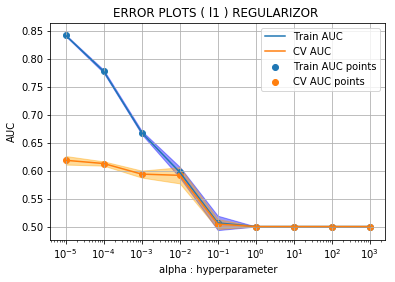


MAXIMUM AUC -  0.618445436744557


In [86]:
hyperparametertune(X_bow_train , y_train ,"l1" )

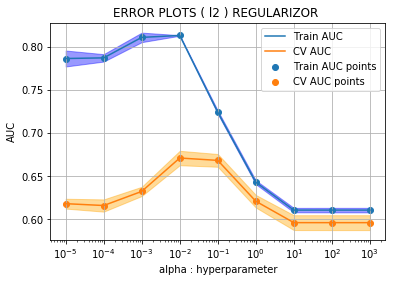


MAXIMUM AUC -  0.6707785322378544


In [87]:
hyperparametertune(X_bow_train , y_train ,"l2" )

In [88]:
best_alpha_bow=0.01

### ROC

In [89]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

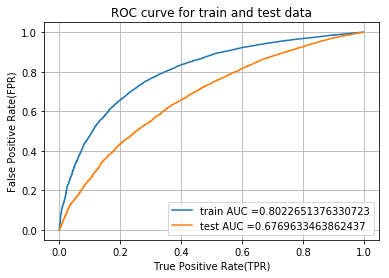

In [90]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

clf_sgd = SGDClassifier(loss = "hinge", alpha=best_alpha_bow , penalty="l2", random_state = 0, class_weight = 'balanced')
clf_sgd.fit(X_bow_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

clf_calib = CalibratedClassifierCV(clf_sgd, cv=5, method='sigmoid')
clf_calib.fit(X_bow_train, y_train)

y_train_bow_pred = batch_predict(clf_calib, X_bow_train)    
y_test_bow_pred = batch_predict(clf_calib, X_bow_test)

train_bow_fpr, train_bow_tpr, train_bow_thresholds = roc_curve(y_train, y_train_bow_pred)
test_bow_fpr, test_bow_tpr, test_bow_thresholds= roc_curve(y_test, y_test_bow_pred)

bow_train_auc = auc(train_bow_fpr, train_bow_tpr)
plt.plot(train_bow_fpr, train_bow_tpr, label="train AUC ="+str(auc(train_bow_fpr, train_bow_tpr)))

bow_test_auc = auc(test_bow_fpr, test_bow_tpr)
plt.plot(test_bow_fpr, test_bow_tpr, label="test AUC ="+str(bow_test_auc))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

### Confusion Matrix

In [91]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


### Train Data

In [92]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_bow_pred, train_bow_thresholds, train_bow_fpr, train_bow_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999427987268 for threshold 0.779
[[ 3305  3306]
 [ 4281 32839]]


the maximum value of tpr*(1-fpr) 0.24999999427987268 for threshold 0.779


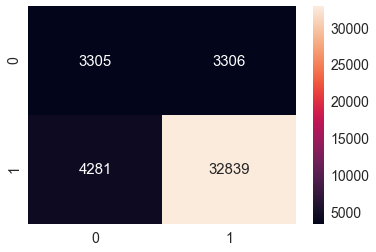

In [93]:
cm_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_bow_pred, train_bow_thresholds, train_bow_fpr, train_bow_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_train, annot=True, annot_kws={"size": 15}, fmt='g')

### Test Data

In [94]:
print("test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_bow_pred, test_bow_thresholds, test_bow_fpr, test_bow_fpr)))

test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.82
[[ 2024  2024]
 [ 5858 16869]]


the maximum value of tpr*(1-fpr) 0.25 for threshold 0.82


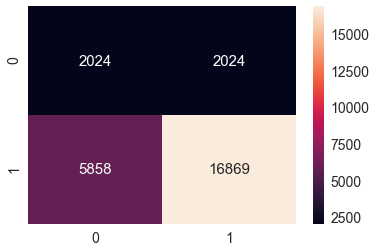

In [95]:
cm_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_bow_pred, test_bow_thresholds, test_bow_fpr, test_bow_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_test, annot=True, annot_kws={"size": 15}, fmt='g')

## 2.4.2 Applying SVM on TFIDF,<font color='red'> SET 2</font>

In [96]:
# concatinating all the features
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
X_tfidf_train = hstack((X_train_tfidf_essay, X_train_tfidf_title, X_train_school_state_one_hot, X_train_project_grade_category_one_hot, X_train_clean_categories_one_hot, X_train_clean_subcategories_one_hot, X_train_teacher_prefix_one_hot, X_train_teacher_number_of_previously_posted_projects, X_train_price, X_train_quantity)).tocsr()
X_tfidf_cv = hstack((X_cv_tfidf_essay, X_cv_tfidf_title, X_cv_school_state_one_hot, X_cv_project_grade_category_one_hot, X_cv_clean_categories_one_hot, X_cv_clean_subcategories_one_hot, X_cv_teacher_prefix_one_hot, X_cv_teacher_number_of_previously_posted_projects, X_cv_price, X_cv_quantity)).tocsr()
X_tfidf_test = hstack((X_test_tfidf_essay, X_test_tfidf_title, X_test_school_state_one_hot, X_test_project_grade_category_one_hot, X_test_clean_categories_one_hot, X_test_clean_subcategories_one_hot, X_test_teacher_prefix_one_hot, X_test_teacher_number_of_previously_posted_projects, X_test_price, X_test_quantity)).tocsr()

print("Final Data matrix")
print("="*50)
print(X_tfidf_train.shape, y_train.shape)
print(X_tfidf_cv.shape, y_cv.shape)
print(X_tfidf_test.shape, y_test.shape)


Final Data matrix
(43731, 16538) (43731,)
(18742, 16538) (18742,)
(26775, 16538) (26775,)


### Hyper parameter tuning using Grid search

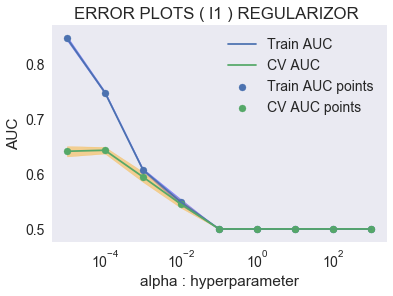


MAXIMUM AUC -  0.6433996230464302


In [97]:
hyperparametertune(X_tfidf_train , y_train ,"l1" )

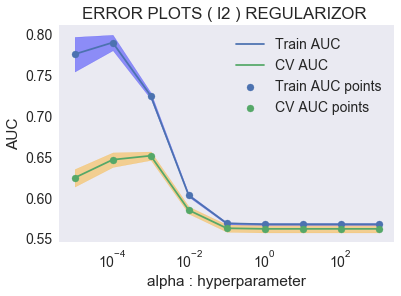


MAXIMUM AUC -  0.6514838948429219


In [98]:
hyperparametertune(X_tfidf_train , y_train ,"l2" )

In [138]:
best_alpha_tfidf=0.001

### ROC

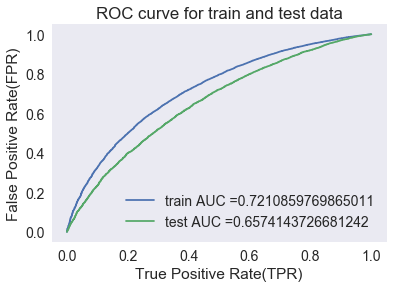

In [139]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

clf_sgd = SGDClassifier(loss = "hinge", alpha=best_alpha_tfidf , penalty="l2", random_state = 0, class_weight = 'balanced')
clf_sgd.fit(X_tfidf_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

clf_calib = CalibratedClassifierCV(clf_sgd, cv=5, method='sigmoid')
clf_calib.fit(X_tfidf_train, y_train)

y_train_tfidf_pred = batch_predict(clf_calib, X_tfidf_train)    
y_test_tfidf_pred = batch_predict(clf_calib, X_tfidf_test)

train_tfidf_fpr, train_tfidf_tpr, train_tfidf_thresholds = roc_curve(y_train, y_train_tfidf_pred)
test_tfidf_fpr, test_tfidf_tpr, test_tfidf_thresholds= roc_curve(y_test, y_test_tfidf_pred)

tfidf_train_auc = auc(train_tfidf_fpr, train_tfidf_tpr)
plt.plot(train_tfidf_fpr, train_tfidf_tpr, label="train AUC ="+str(auc(train_tfidf_fpr, train_tfidf_tpr)))

tfidf_test_auc = auc(test_tfidf_fpr, test_tfidf_tpr)
plt.plot(test_tfidf_fpr, test_tfidf_tpr, label="test AUC ="+str(tfidf_test_auc))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

### Confusion Matrix

### Train Data

In [101]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_tfidf_pred, train_tfidf_thresholds, train_tfidf_fpr, train_tfidf_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999427987268 for threshold 0.837
[[ 3306  3305]
 [13342 23778]]


the maximum value of tpr*(1-fpr) 0.24999999427987268 for threshold 0.837


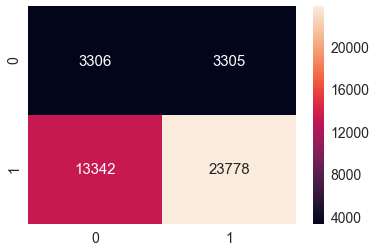

In [102]:
cm_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_tfidf_pred, train_tfidf_thresholds, train_tfidf_fpr, train_tfidf_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_train, annot=True, annot_kws={"size": 15}, fmt='g')

### Test Data

In [103]:
from sklearn.metrics import confusion_matrix
print("test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_tfidf_pred, test_tfidf_thresholds, test_tfidf_fpr, test_tfidf_fpr)))


test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.838
[[ 2024  2024]
 [ 8415 14312]]


the maximum value of tpr*(1-fpr) 0.25 for threshold 0.838


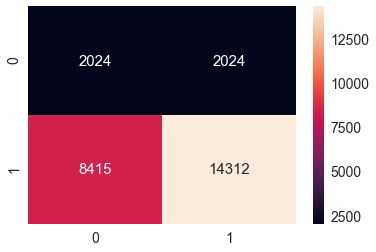

In [104]:
cm_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_tfidf_pred, test_tfidf_thresholds, test_tfidf_fpr, test_tfidf_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_test, annot=True, annot_kws={"size": 15}, fmt='g')

## 2.4.3 Applying SVM on AVGW2V,<font color='red'> SET 3</font>

In [105]:
# concatinating all the features
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
X_avgw2v_train = hstack((X_train_avgw2v_essay, X_train_avgw2v_title, X_train_school_state_one_hot, X_train_project_grade_category_one_hot, X_train_clean_categories_one_hot, X_train_clean_subcategories_one_hot, X_train_teacher_prefix_one_hot, X_train_teacher_number_of_previously_posted_projects, X_train_price, X_train_quantity)).tocsr()
X_avgw2v_cv = hstack((X_cv_avgw2v_essay, X_cv_avgw2v_title, X_cv_school_state_one_hot, X_cv_project_grade_category_one_hot, X_cv_clean_categories_one_hot, X_cv_clean_subcategories_one_hot, X_cv_teacher_prefix_one_hot, X_cv_teacher_number_of_previously_posted_projects, X_cv_price, X_cv_quantity)).tocsr()
X_avgw2v_test = hstack((X_test_avgw2v_essay, X_test_avgw2v_title, X_test_school_state_one_hot, X_test_project_grade_category_one_hot, X_test_clean_categories_one_hot, X_test_clean_subcategories_one_hot, X_test_teacher_prefix_one_hot, X_test_teacher_number_of_previously_posted_projects, X_test_price, X_test_quantity)).tocsr()

print("Final Data matrix")
print("="*50)
print(X_avgw2v_train.shape, y_train.shape)
print(X_avgw2v_cv.shape, y_cv.shape)
print(X_avgw2v_test.shape, y_test.shape)


Final Data matrix
(43731, 703) (43731,)
(18742, 703) (18742,)
(26775, 703) (26775,)


### Hyper parameter Tuning using Gridsearch

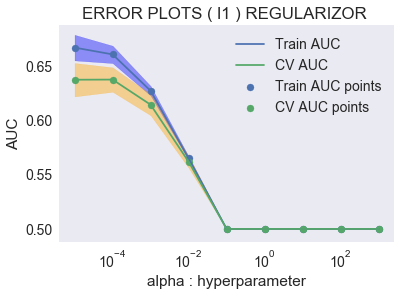


MAXIMUM AUC -  0.6374611730061222


In [106]:
hyperparametertune(X_avgw2v_train , y_train ,"l1" )

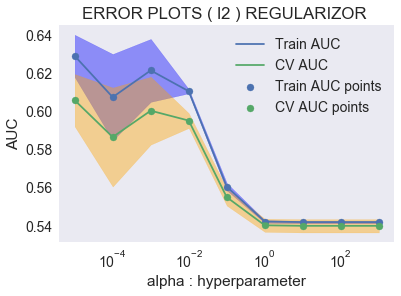


MAXIMUM AUC -  0.6058881591476825


In [107]:
hyperparametertune(X_avgw2v_train , y_train ,"l2" )

In [108]:
best_alpha_avgw2v=0.0001

### ROC

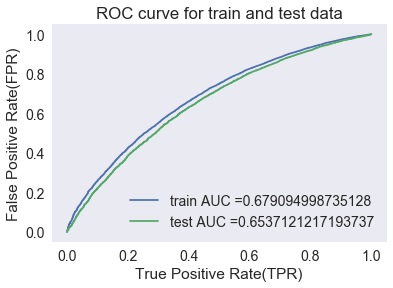

In [109]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

clf_sgd = SGDClassifier(loss = "hinge", alpha=best_alpha_avgw2v , penalty="l1", random_state = 0, class_weight = 'balanced')
clf_sgd.fit(X_avgw2v_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

clf_calib = CalibratedClassifierCV(clf_sgd, cv=5, method='sigmoid')
clf_calib.fit(X_avgw2v_train, y_train)

y_train_avgw2v_pred = batch_predict(clf_calib, X_avgw2v_train)    
y_test_avgw2v_pred = batch_predict(clf_calib, X_avgw2v_test)

train_avgw2v_fpr, train_avgw2v_tpr, train_avgw2v_thresholds = roc_curve(y_train, y_train_avgw2v_pred)
test_avgw2v_fpr, test_avgw2v_tpr, test_avgw2v_thresholds= roc_curve(y_test, y_test_avgw2v_pred)

avgw2v_train_auc = auc(train_avgw2v_fpr, train_avgw2v_tpr)
plt.plot(train_avgw2v_fpr, train_avgw2v_tpr, label="train AUC ="+str(auc(train_avgw2v_fpr, train_avgw2v_tpr)))

avgw2v_test_auc = auc(test_avgw2v_fpr, test_avgw2v_tpr)
plt.plot(test_avgw2v_fpr, test_avgw2v_tpr, label="test AUC ="+str(avgw2v_test_auc))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

### Confusion Matrix

### Train Data

In [110]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_avgw2v_pred, train_avgw2v_thresholds, train_avgw2v_fpr, train_avgw2v_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999427987268 for threshold 0.829
[[ 3305  3306]
 [ 9318 27802]]


the maximum value of tpr*(1-fpr) 0.24999999427987268 for threshold 0.829


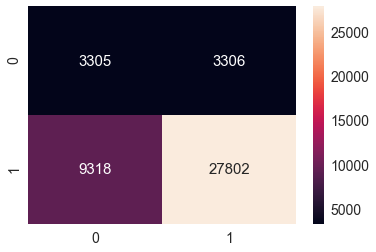

In [111]:
cm_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_avgw2v_pred, train_avgw2v_thresholds, train_avgw2v_fpr, train_avgw2v_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_train, annot=True, annot_kws={"size": 15}, fmt='g')

### Test Data

In [112]:
from sklearn.metrics import confusion_matrix
print("test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_avgw2v_pred, test_avgw2v_thresholds, test_avgw2v_fpr, test_avgw2v_fpr)))


test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.832
[[ 2024  2024]
 [ 6344 16383]]


the maximum value of tpr*(1-fpr) 0.25 for threshold 0.832


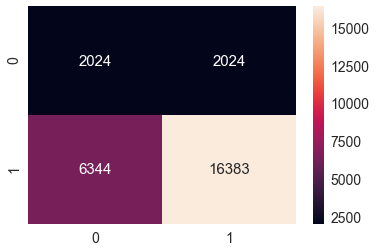

In [113]:
cm_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_avgw2v_pred, test_avgw2v_thresholds, test_avgw2v_fpr, test_avgw2v_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_test, annot=True, annot_kws={"size": 15}, fmt='g')

## 2.4.4 Applying SVM on TFIDF W2V,<font color='red'> SET 4</font>

In [114]:
# concatinating all the features
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
X_weightw2v_train = hstack((X_train_weightw2v_essay, X_train_weightw2v_title, X_train_school_state_one_hot, X_train_project_grade_category_one_hot, X_train_clean_categories_one_hot, X_train_clean_subcategories_one_hot, X_train_teacher_prefix_one_hot, X_train_teacher_number_of_previously_posted_projects, X_train_price, X_train_quantity)).tocsr()
X_weightw2v_cv = hstack((X_cv_weightw2v_essay, X_cv_weightw2v_title, X_cv_school_state_one_hot, X_cv_project_grade_category_one_hot, X_cv_clean_categories_one_hot, X_cv_clean_subcategories_one_hot, X_cv_teacher_prefix_one_hot, X_cv_teacher_number_of_previously_posted_projects, X_cv_price, X_cv_quantity)).tocsr()
X_weightw2v_test = hstack((X_test_weightw2v_essay, X_test_weightw2v_title, X_test_school_state_one_hot, X_test_project_grade_category_one_hot, X_test_clean_categories_one_hot, X_test_clean_subcategories_one_hot, X_test_teacher_prefix_one_hot, X_test_teacher_number_of_previously_posted_projects, X_test_price, X_test_quantity)).tocsr()

print("Final Data matrix")
print("="*50)
print(X_weightw2v_train.shape, y_train.shape)
print(X_weightw2v_cv.shape, y_cv.shape)
print(X_weightw2v_test.shape, y_test.shape)


Final Data matrix
(43731, 703) (43731,)
(18742, 703) (18742,)
(26775, 703) (26775,)


### Hyper parameter Tuning using Gridsearch

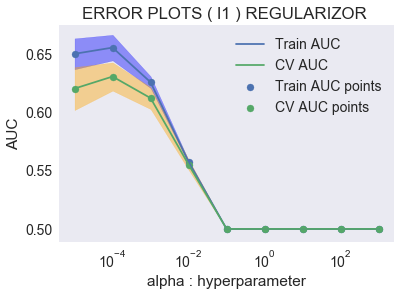


MAXIMUM AUC -  0.630652514228594


In [115]:
hyperparametertune(X_weightw2v_train , y_train ,"l1" )

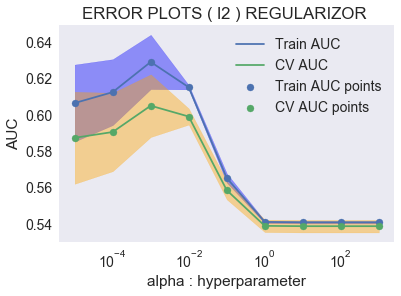


MAXIMUM AUC -  0.605071997945539


In [116]:
hyperparametertune(X_weightw2v_train , y_train ,"l2" )

In [117]:
best_alpha_weightw2v=0.0001

### ROC

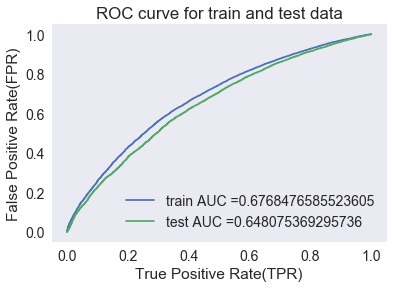

In [118]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

clf_sgd = SGDClassifier(loss = "hinge", alpha=best_alpha_weightw2v , penalty="l1", random_state = 0, class_weight = 'balanced')
clf_sgd.fit(X_weightw2v_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

clf_calib = CalibratedClassifierCV(clf_sgd, cv=5, method='sigmoid')
clf_calib.fit(X_weightw2v_train, y_train)

y_train_weightw2v_pred = batch_predict(clf_calib, X_weightw2v_train)    
y_test_weightw2v_pred = batch_predict(clf_calib, X_weightw2v_test)

train_weightw2v_fpr, train_weightw2v_tpr, train_weightw2v_thresholds = roc_curve(y_train, y_train_weightw2v_pred)
test_weightw2v_fpr, test_weightw2v_tpr, test_weightw2v_thresholds= roc_curve(y_test, y_test_weightw2v_pred)

weightw2v_train_auc = auc(train_weightw2v_fpr, train_weightw2v_tpr)
plt.plot(train_weightw2v_fpr, train_weightw2v_tpr, label="train AUC ="+str(auc(train_weightw2v_fpr, train_weightw2v_tpr)))

weightw2v_test_auc = auc(test_weightw2v_fpr, test_weightw2v_tpr)
plt.plot(test_weightw2v_fpr, test_weightw2v_tpr, label="test AUC ="+str(weightw2v_test_auc))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

### Confusion Matrix

### Train Data

In [119]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_weightw2v_pred, train_weightw2v_thresholds, train_weightw2v_fpr, train_weightw2v_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999427987268 for threshold 0.832
[[ 3306  3305]
 [ 9509 27611]]


the maximum value of tpr*(1-fpr) 0.24999999427987268 for threshold 0.832


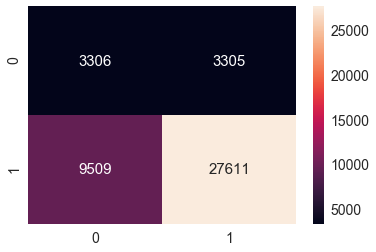

In [120]:
cm_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_weightw2v_pred, train_weightw2v_thresholds, train_weightw2v_fpr, train_weightw2v_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_train, annot=True, annot_kws={"size": 15}, fmt='g')

### Test Data

In [121]:
print("test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_weightw2v_pred, test_weightw2v_thresholds, test_weightw2v_fpr, test_weightw2v_fpr)))


test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.835
[[ 2024  2024]
 [ 6672 16055]]


the maximum value of tpr*(1-fpr) 0.25 for threshold 0.835


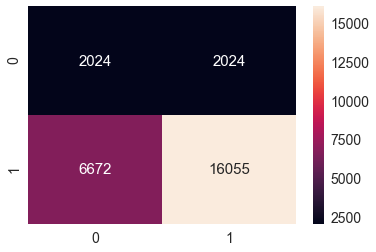

In [122]:
cm_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_weightw2v_pred, test_weightw2v_thresholds, test_weightw2v_fpr, test_weightw2v_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_test, annot=True, annot_kws={"size": 15}, fmt='g')

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

### Dimensionality Reduction of tfidf encoded essay feature

In [123]:
print("shape of TFIDF essay  ")
print()
print(X_train_tfidf_essay.shape)
print(X_cv_tfidf_essay.shape)
print(X_test_tfidf_essay.shape)

shape of TFIDF essay  

(43731, 5000)
(18742, 5000)
(26775, 5000)


In [124]:
from sklearn.decomposition import TruncatedSVD as TSVD

t_svd = TSVD(n_components = X_train_tfidf_essay.shape[1]-1)
t_svd.fit_transform(X_train_tfidf_essay)

percentage_var_explained = t_svd.explained_variance_ / np.sum(t_svd.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

print(cum_var_explained)


[0.00151419 0.00667421 0.01099807 ... 0.99999429 0.99999731 1.        ]


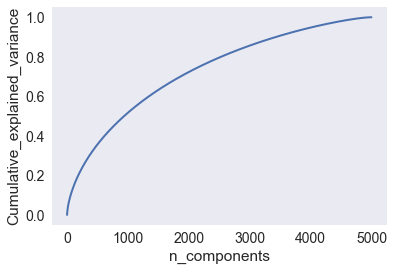

In [125]:
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


In [126]:
tsvd = TSVD(n_components = 3500)
X_train_tfidf_essay_reduced = tsvd.fit_transform(X_train_tfidf_essay)
X_test_tfidf_essay_reduced = tsvd.fit_transform(X_test_tfidf_essay)
X_cv_tfidf_essay_reduced = tsvd.fit_transform(X_cv_tfidf_essay)


In [127]:
print("shape of TFIDF essay after reduction ")
print()
print(X_train_tfidf_essay_reduced.shape)
print(X_cv_tfidf_essay_reduced.shape)
print(X_test_tfidf_essay_reduced.shape)

shape of TFIDF essay after reduction 

(43731, 3500)
(18742, 3500)
(26775, 3500)


### Merge all the features 

In [128]:
# concatinating all the features
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
X_added_train = hstack((X_train_tfidf_essay_reduced, X_train_school_state_one_hot, X_train_project_grade_category_one_hot, X_train_clean_categories_one_hot, X_train_clean_subcategories_one_hot, X_train_teacher_prefix_one_hot, X_train_teacher_number_of_previously_posted_projects, X_train_price, X_train_quantity, X_train_title_norm, X_train_essay_norm, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train)).tocsr()
X_added_cv = hstack((X_cv_tfidf_essay_reduced, X_cv_school_state_one_hot, X_cv_project_grade_category_one_hot, X_cv_clean_categories_one_hot, X_cv_clean_subcategories_one_hot, X_cv_teacher_prefix_one_hot, X_cv_teacher_number_of_previously_posted_projects, X_cv_price, X_cv_quantity, X_cv_title_norm, X_cv_essay_norm, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_comp_cv)).tocsr()
X_added_test = hstack((X_test_tfidf_essay_reduced, X_test_school_state_one_hot, X_test_project_grade_category_one_hot, X_test_clean_categories_one_hot, X_test_clean_subcategories_one_hot, X_test_teacher_prefix_one_hot, X_test_teacher_number_of_previously_posted_projects, X_test_price, X_test_quantity, X_test_title_norm, X_test_essay_norm, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test)).tocsr()

print("Final Data matrix")
print("="*50)
print(X_tfidf_train.shape, y_train.shape)
print(X_tfidf_cv.shape, y_cv.shape)
print(X_tfidf_test.shape, y_test.shape)


Final Data matrix
(43731, 16538) (43731,)
(18742, 16538) (18742,)
(26775, 16538) (26775,)


### Hyper parameter Tuning using Grid search

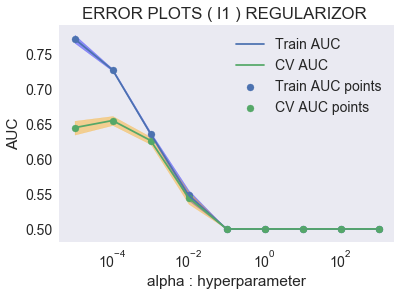


MAXIMUM AUC -  0.65555716783902


In [129]:
hyperparametertune(X_added_train , y_train ,"l1" )

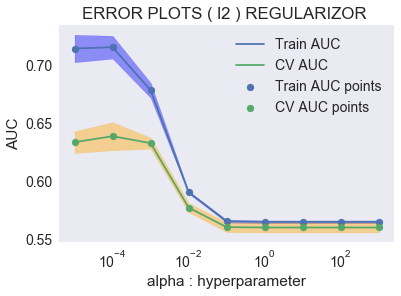


MAXIMUM AUC -  0.6390192763364223


In [130]:
hyperparametertune(X_added_train , y_train ,"l2" )

In [131]:
best_alpha_added = 0.0001

### ROC

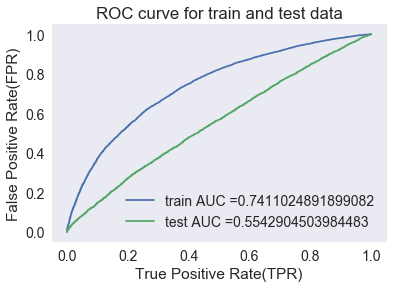

In [132]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

clf_sgd = SGDClassifier(loss = "hinge", alpha=best_alpha_added , penalty="l1", random_state = 0, class_weight = 'balanced')
clf_sgd.fit(X_added_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

clf_calib = CalibratedClassifierCV(clf_sgd, cv=5, method='sigmoid')
clf_calib.fit(X_added_train, y_train)

y_train_added_pred = batch_predict(clf_calib, X_added_train)    
y_test_added_pred = batch_predict(clf_calib, X_added_test)

train_added_fpr, train_added_tpr, train_added_thresholds = roc_curve(y_train, y_train_added_pred)
test_added_fpr, test_added_tpr, test_added_thresholds= roc_curve(y_test, y_test_added_pred)

added_train_auc = auc(train_added_fpr, train_added_tpr)
plt.plot(train_added_fpr, train_added_tpr, label="train AUC ="+str(auc(train_added_fpr, train_added_tpr)))

added_test_auc = auc(test_added_fpr, test_added_tpr)
plt.plot(test_added_fpr, test_added_tpr, label="test AUC ="+str(added_test_auc))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

### Confusion Matrix

### Train Data

In [133]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_added_pred, train_added_thresholds, train_added_fpr, train_added_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999427987268 for threshold 0.808
[[ 3305  3306]
 [ 6583 30537]]


the maximum value of tpr*(1-fpr) 0.24999999427987268 for threshold 0.808


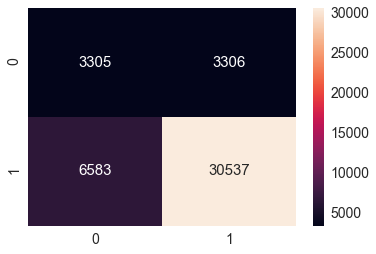

In [134]:
cm_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_added_pred, train_added_thresholds, train_added_fpr, train_added_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_train, annot=True, annot_kws={"size": 15}, fmt='g')

### Test Data

In [135]:
print("test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_added_pred, test_added_thresholds, test_added_fpr, test_added_fpr)))


test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.847
[[ 2024  2024]
 [ 9828 12899]]


the maximum value of tpr*(1-fpr) 0.25 for threshold 0.847


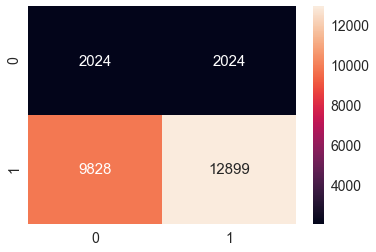

In [136]:
cm_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_added_pred, test_added_thresholds, test_added_fpr, test_added_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_test, annot=True, annot_kws={"size": 15}, fmt='g')

<h1>3. Conclusion</h1>

In [137]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
   
x = PrettyTable()

x.field_names = ["Vectorizer", "Model","Regularizor", "Hyper Parameter", "AUC"]

x.add_row(["BOW", "Brute", "L2", str(best_alpha_bow), str(bow_test_auc)])
x.add_row(["TFIDF", "Brute","L2", str(best_alpha_tfidf), str(tfidf_test_auc)])
x.add_row(["AVGAVW2V", "Brute", "L1",str(best_alpha_avgw2v), str(avgw2v_test_auc)])
x.add_row(["TFIDFW2V","Brute", "L1",str(best_alpha_weightw2v), str(weightw2v_test_auc)])
x.add_row(["SEt-5 added features","Brute","L1", str(best_alpha_added), str(added_test_auc)])

print(x)

+----------------------+-------+-------------+-----------------+--------------------+
|      Vectorizer      | Model | Regularizor | Hyper Parameter |        AUC         |
+----------------------+-------+-------------+-----------------+--------------------+
|         BOW          | Brute |      L2     |       0.01      | 0.6769633463862437 |
|        TFIDF         | Brute |      L2     |       0.01      | 0.5878794078137632 |
|       AVGAVW2V       | Brute |      L1     |      0.0001     | 0.6537121217193737 |
|       TFIDFW2V       | Brute |      L1     |      0.0001     | 0.648075369295736  |
| SEt-5 added features | Brute |      L1     |      0.0001     | 0.5542904503984483 |
+----------------------+-------+-------------+-----------------+--------------------+


1. Here all the model except set-5 are perfoming reasonably well.
2. There is nothing much difference even after removing text data as the performance even decreses
3. So overall TFIDF performs better with 67% AUC
